### Support Vector Machines

It is a supervised machine learning algorithm used mainly for classification problems. The goal is to for $n$ dimensional data find a hyperplane in $n-1$ dimensions which best separates the data. Support vectors are points which are the closest to the hyperplane. The distance between them and the hyperplane in perpendicular direction is called margin. 

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

iris = load_iris()

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']

In [3]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

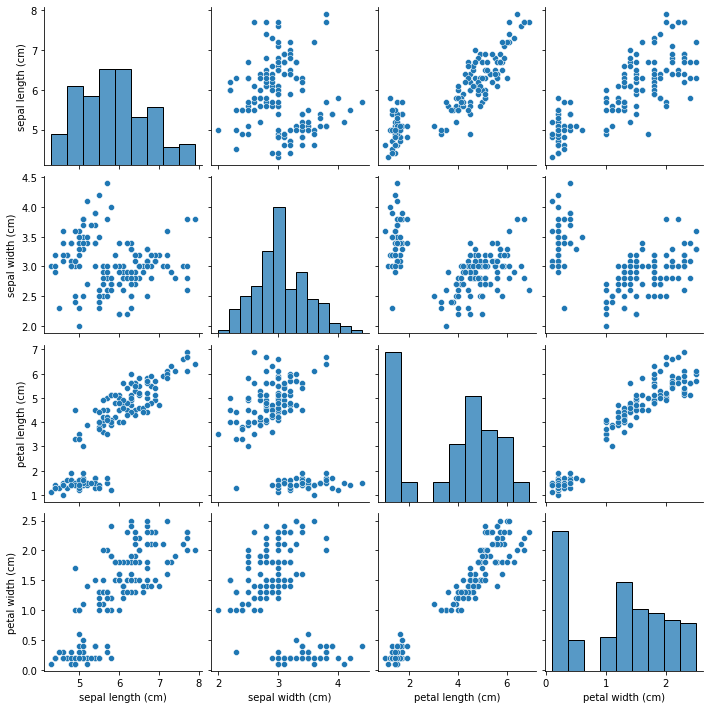

In [4]:
sns.pairplot(iris_df.iloc[:, :4])

For two dimensional data, we would be looking for a line. Below we 'guessed' a line which separates the data and leaves the largest margin

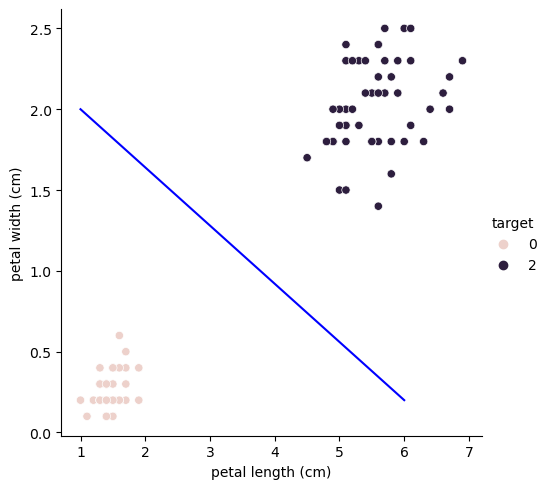

In [5]:
iris_0_2 = iris_df[iris_df['target'] != 1]
sns.relplot(data=iris_0_2, x='petal length (cm)', y='petal width (cm)', hue='target', kind='scatter')
plt.plot(np.array([1, 6]), np.array([2.0, 0.2]), c='b')

The case above was easy, but not all data can be ideally separated. Hence, we must use soft margin classification, which allows for some points to be missclassified

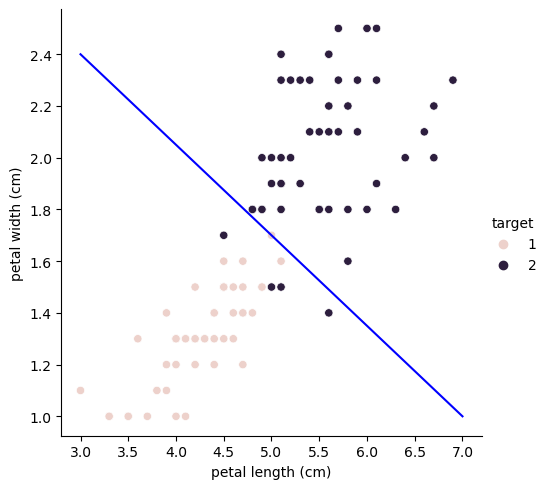

In [6]:
iris_1_2 = iris_df[iris_df['target'] != 0]
sns.relplot(data=iris_1_2, x='petal length (cm)', y='petal width (cm)', hue='target', kind='scatter')
plt.plot(np.array([3.0, 7.0]), np.array([2.4, 1.0]), c='b')

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X = iris_df.iloc[:, :4]
y = iris_df['target'] == 2 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

svc_clf = make_pipeline(
    StandardScaler(), LinearSVC(C=1, loss='hinge')
)
svc_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, loss='hinge'))])

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

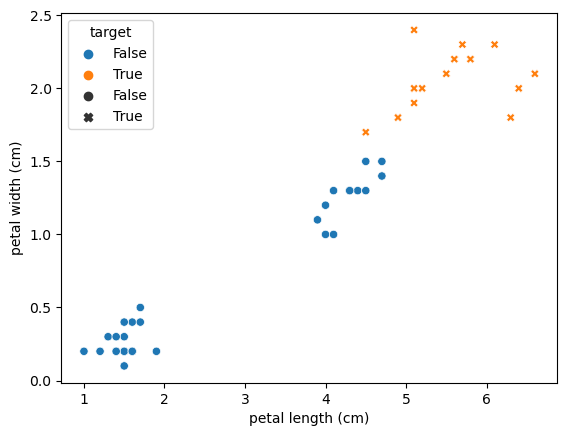

In [8]:
y_pred = svc_clf.predict(X_test)
markers = {True: 'x', False: 's'}
sns.scatterplot(x=X_test['petal length (cm)'], y=X_test['petal width (cm)'], style=y_pred, 
                hue=y_test)

Accuracy

In [9]:
(1 - abs(y_pred ^ y_test)).mean()

1.0

In [10]:
pulsar_data = pd.read_csv('./data/pulsar_data_train.csv')
pulsar_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [11]:
pulsar_data.columns = pulsar_data.columns.str.strip()

In [12]:
pulsar_data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [13]:
pulsar_data.isna().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1735
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1178
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     625
target_class                                       0
dtype: int64

In [14]:
pulsar_data = pulsar_data.fillna({'Excess kurtosis of the integrated profile': pulsar_data['Excess kurtosis of the integrated profile'].mean(), 
                    'Standard deviation of the DM-SNR curve': pulsar_data['Standard deviation of the DM-SNR curve'].mean(),
                    'Skewness of the DM-SNR curve': pulsar_data['Skewness of the DM-SNR curve'].mean()})
pulsar_data.isna().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

We have imbalanced dataset 

In [15]:
print(pulsar_data['target_class'].value_counts())
print(pulsar_data['target_class'].value_counts() / len(pulsar_data))

0.0    11375
1.0     1153
Name: target_class, dtype: int64
0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64


One naive method to handle imbalanced dataset is to randomly sample with replacement from the minority class. More sophisticated methods include interpolation and generating new samples. 

In [25]:
y_train = pulsar_data['target_class']
X_train = pulsar_data.drop('target_class', axis=1)

In [27]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over_sampler = RandomOverSampler()
X_over, y_over = over_sampler.fit_resample(X_train, y_train)
print(y_over.value_counts() / len(y_over))
print(len(y_over))

under_sampler = RandomUnderSampler()
X_undex, y_under = under_sampler.fit_resample(X_train, y_train)
print(y_under.value_counts() / len(y_under))
print(len(y_under))

0.0    0.5
1.0    0.5
Name: target_class, dtype: float64
22750
0.0    0.5
1.0    0.5
Name: target_class, dtype: float64
2306


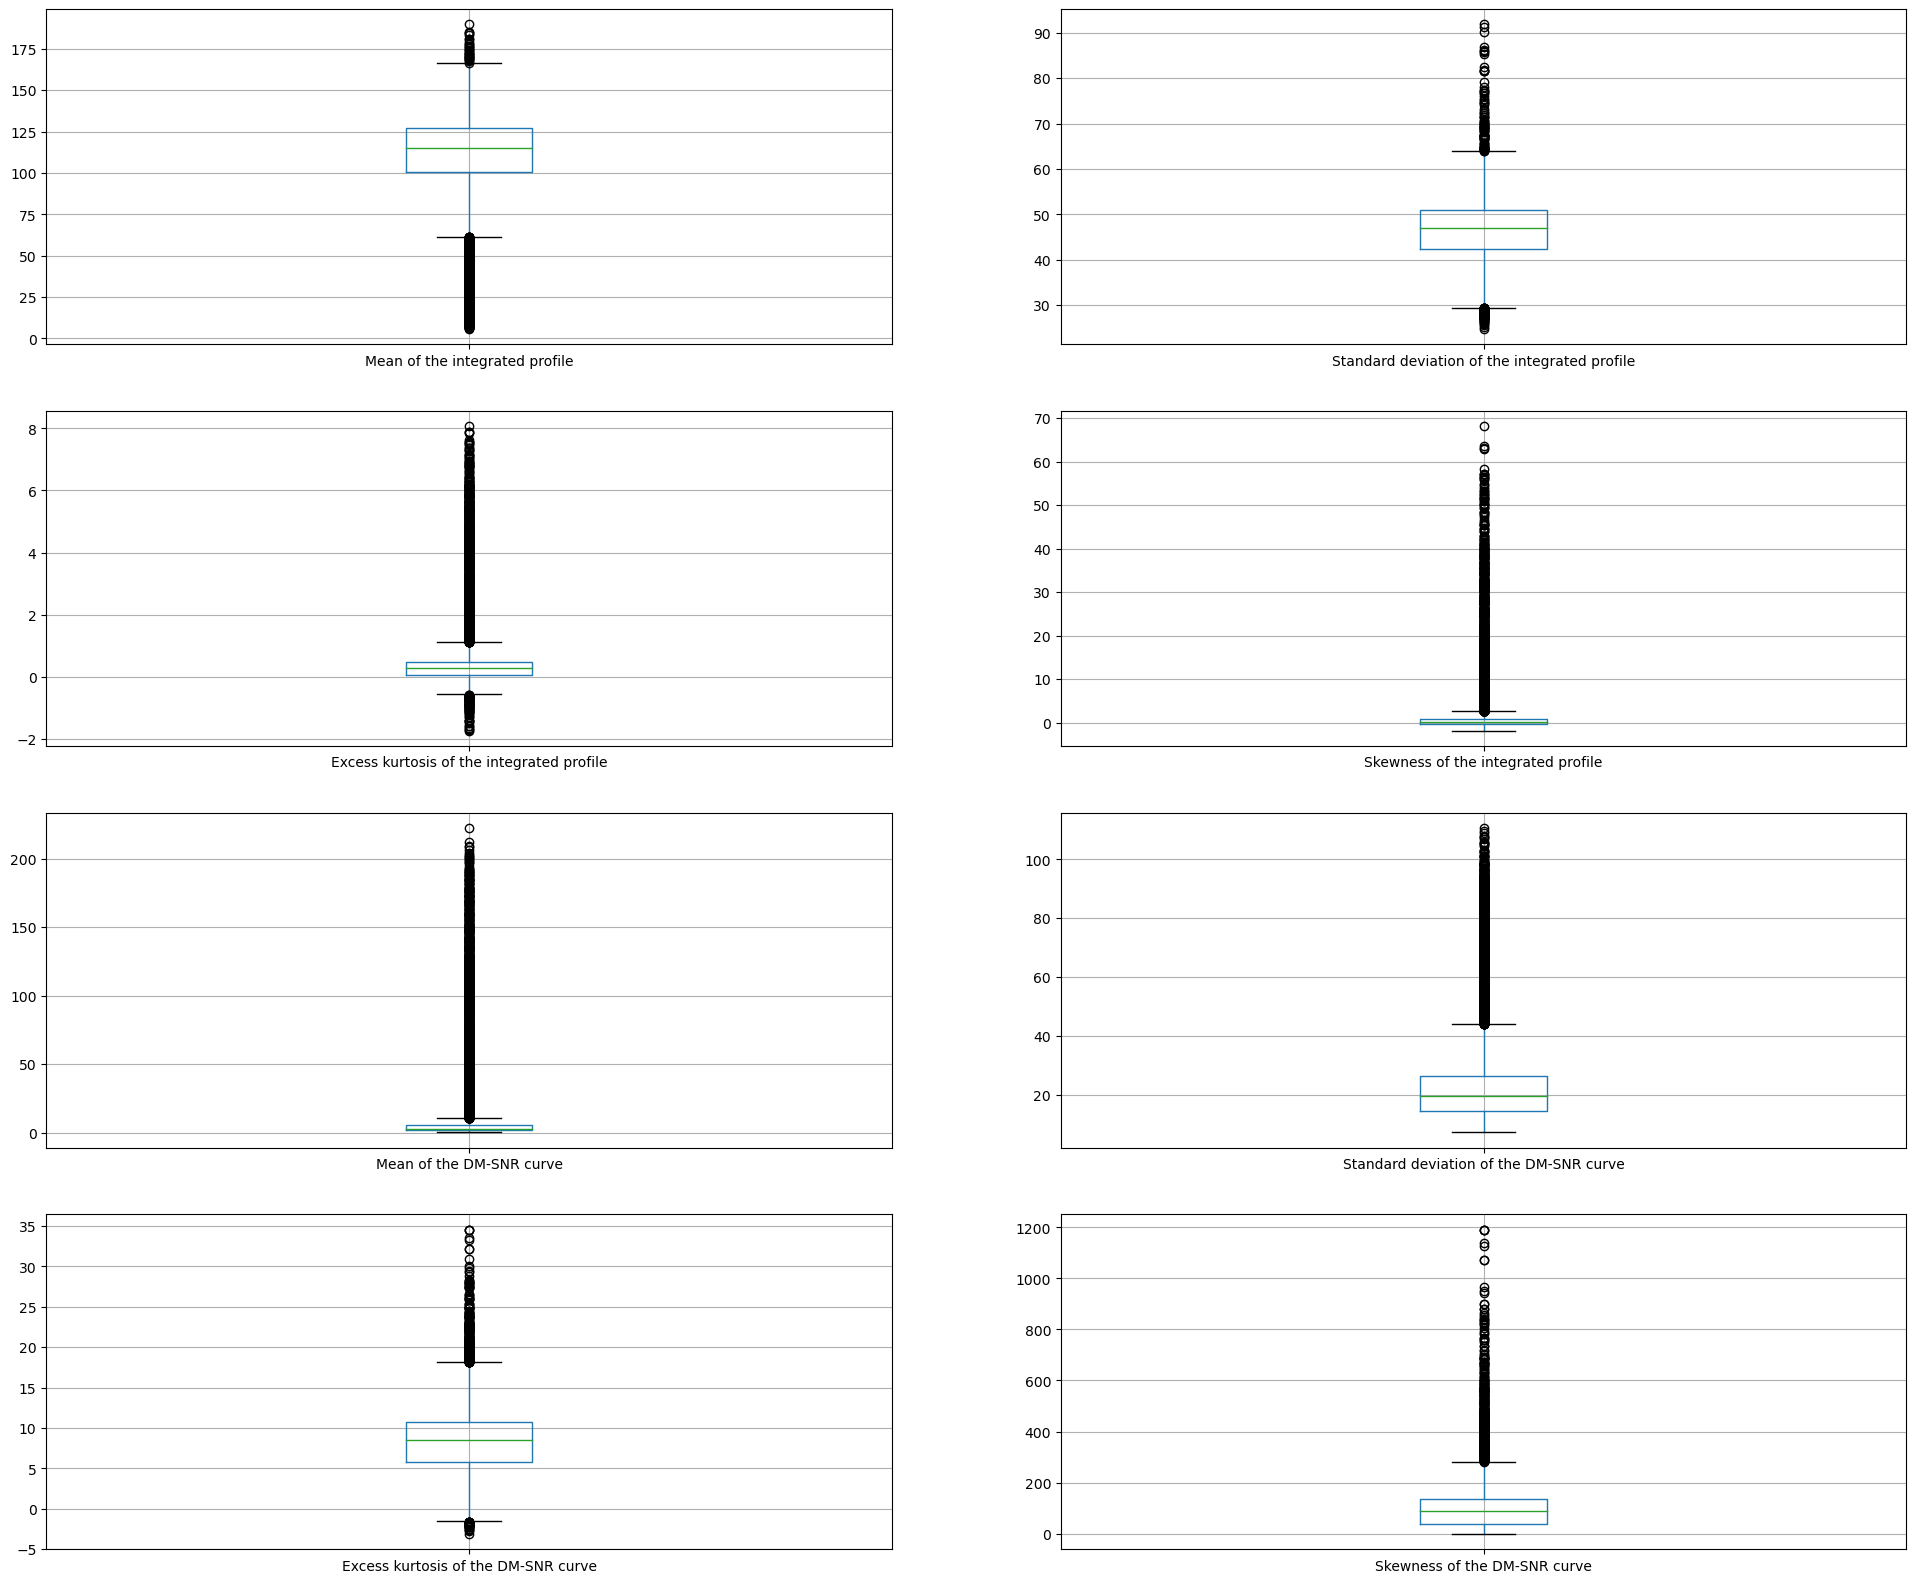

In [28]:
plt.figure(figsize=(24, 20))
for i, c in enumerate(pulsar_data.columns[:-1]):
    plt.subplot(int(len(pulsar_data.columns) / 2), 2, i + 1)
    pulsar_data[[c]].boxplot()

We have outlires, so we'll allow for small margin - large C. We will actually use grid search to find optimal parameters

In [30]:
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [1, 10, 100], 'kernel': ['linear', 'poly','rbf']
}

scaler = StandardScaler()

X = scaler.fit_transform(X_over)
y = y_over

grid_search = GridSearchCV(
    estimator=SVC(), 
    param_grid=parameters,
    cv=5,
    verbose=1
)

grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']})

Null accuracy is the accuracy given a model always predicting the most frequent class.

In [32]:
null_accuracy = (pulsar_data['target_class'] == 0).mean()
null_accuracy

0.9079661558109834

In [33]:
grid_search.best_estimator_

SVC(C=100)

In [34]:
grid_search.best_score_

0.9487472527472527

In [36]:
svc = grid_search.best_estimator_
svc.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}